I've been an active user of Soundcloud for years and in the past two years they've enacted many changes to the app. I'm curious as to how these changes have been received.

In [3]:
### Installing Necessary Packages into Virtual Environment

# pip install -U nltk
# pip install -U spacy
# pip install matplotlib
# pip install app-store-scraper # SOURCE: https://pypi.org/project/app-store-scraper/
# pip install requests authlib
# pip install -U pandas
# pip install nlp
# pip install -U pip setuptools wheel
# # pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz
# pip install -U textblob
# pip spacy download en_core_web_sm
# pip install -U scikit-learn
# pip install wordcloud
# pip install seaborn

In [34]:
# pip install dexplot

     ------------------------------------- 173.4/173.4 kB 10.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Scraping Process

Using the App Store Scraper Package, reviews since 20200 were taken from Apple's App Store.

In [ ]:
# import numpy as np
# import pandas as pd
# from app_store_scraper import AppStore
# from pprint import pprint
# from datetime import datetime

# # for building in wait times
# import random
# import time

# # https://python.plainenglish.io/scraping-app-store-reviews-with-python-90e4117ccdfb
# soundcloud = AppStore(country="us", app_name="soundcloud-discover-new-music")

# # Grabbing Soundcloud Reviews from Apple's App Store
# soundcloud.review(
#     after=datetime(2020, 1, 1),
#     sleep=random.randint(20,25)
#     )

Now we have the ability to access all of our reviews, which are stored as a
semi-structured JSON data. You can think of it as similar to a list of dictionaries.

In [ ]:
# pprint(soundcloud.review)
# type(soundcloud.reviews)

Review count shows us how many reviews we have. We have access to 241 reviews.

In [ ]:
# pprint(soundcloud.reviews_count)

From here we turn the JSON data into a flat Pandas Dataframe, then exported it to a CSV so we don't have to do the scraping process again.

In [ ]:
# Data = pd.json_normalize(soundcloud.reviews)
# Data.to_csv("SoudcloudReviews2020UntilSep2022.csv", header=False)

# 2. Exporatory Data Analysis (EDA)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import dexplot as dxp

Data = pd.read_csv('SoudcloudReviews2020UntilSep2022.csv')

# Deleting First Column
Data = Data.iloc[: , 1:]

Data.head()

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8023 entries, 0 to 8022
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        8023 non-null   object        
 1   Rating       8023 non-null   int64         
 2   Review Date  8023 non-null   datetime64[ns]
 3   Review       8023 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 250.8+ KB


In [13]:
Data['Review Date'] = pd.to_datetime(Data['Review Date'])
Data['Year of Review'] = pd.DatetimeIndex(Data['Review Date']).year
Data['Month of Review'] = pd.DatetimeIndex(Data['Review Date']).month

In [14]:
Data.head()

,Title,Rating,Review Date,Review,Month of Review,Year of Review
0,You need SoundCloud,5,2020-06-26 06:36:00,It’s by far the best music and created platfor...,6,2020
1,SoundCloud Says Something’s Wrong with my Email,4,2021-06-03 20:06:00,"Hello, if you are reading this, please do. I w...",6,2021
2,I did not give permission to renew this APP,1,2021-09-22 12:21:00,I got a free trial. When that free trial was u...,9,2021
3,Great,4,2021-01-30 05:17:00,I been on SoundCloud for at least 5 and a half...,1,2021
4,"Unfortunately, just not worth it anymore.",1,2021-09-21 14:45:00,A couple years ago I would’ve given 10/5 stars...,9,2021


While initially I utilized Seaborn to explore how ratings changed over time, the number of reviews was different for each year and it was September of 2022 when this analysis was done. A better library for quickly looking at percentage counts of groupings of data is dexplot.

As can be seen from this visualization, the number of 5-star reviews appears to be slightly decreasing, while the number of 1-star reviews appears to be very slightly increasing.

c:\Users\nickb\Anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


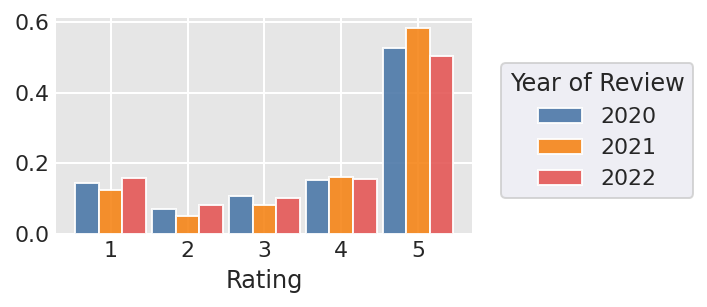

In [36]:
dxp.count('Rating', data=Data, split='Year of Review', normalize='Year of Review')

# Sentiment Analysis

To get a better understanding of what type of complaints 1-star reviewers are having, this data was further analyzed using different language processing techniques.

In [45]:
OneStar = Data[Data['Rating'] == 1]

### Polarity and Subjectivity using TextBlob

The first used was TextBlob. Each Review was a given a score for polarity and subjectivity.

"We then can calculate the sentiment through the...
- polarity function. polarity ranges from -1 to 1, with -1 being negative and 1 being positive.
- subjectivity function to calculate subjectivity, which ranges from 0 to 1, with 0 being objective and 1 being subjective."
-- https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5


In [46]:
#Extract only survey OneStarComments
OneStarComments = OneStar['Review']
OneStarComments = OneStarComments.astype('str')

#Defining function to remove non-ascii characters
def _removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

#Removing the non-ascii characters
OneStarComments = OneStarComments.map(lambda x: _removeNonAscii(x))
OneStarComments = pd.DataFrame(OneStarComments)

# Creating Polarity & Subjective Columns
from textblob import TextBlob

OneStarComments['polarity'] = OneStarComments['Review'].apply(lambda x: TextBlob(x).polarity)
OneStarComments['subjective'] = OneStarComments['Review'].apply(lambda x: TextBlob(x).subjectivity)

In [66]:
OneStarComments

,Review,polarity,subjective
2,I got a free trial. When that free trial was u...,0.335369,0.459091
4,A couple years ago I wouldve given 10/5 stars ...,-0.037500,0.462434
27,"The app has always been painfully slow, but it...",-0.098906,0.493415
28,i've been publishing my music on here for 2 ye...,0.021875,0.557292
32,Ive used SoundCloud for years. First issue was...,0.089773,0.423548
...,...,...,...
8010,I cant wait to cancel this garbage app,0.000000,0.000000
8012,SOUNCLOUD please fix your app I need music and...,1.000000,1.000000
8014,Everytime I get on the app its slow as I dont ...,-0.300000,0.400000
8015,I was trying to make an account and it kept sa...,0.000000,0.000000


## Bigrams and Trigrams

In [58]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['SOUNCLOUD'] + ['Soundcloud']

from sklearn.feature_extraction.text import CountVectorizer

c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))

# matrix of ngrams
ngrams = c_vec.fit_transform(OneStar['Review'])

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


c:\Users\nickb\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['souncloud', 'soundcloud'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [59]:
df_ngram.drop(df_ngram.filter(regex='^soundcloud').columns, axis=1)

,frequency,bigram/trigram
0,99,every song
1,89,soundcloud go
2,86,listen music
3,56,please fix
4,49,every time
...,...,...
37223,1,00 time
37224,1,00 sub use
37225,1,00 sub
37226,1,00 figured would


## Topic Modeling

### Non-Negative Matrix Factorization (NMF)

In [67]:
# Source: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, nmf)
pipe.fit(OneStarComments['Review'])

c:\Users\nickb\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['souncloud', 'soundcloud'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(2, 3),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nmf', NMF(n_components=3))])

In [68]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [69]:
print_top_words(nmf, tfidf_vectorizer.get_feature_names(), n_top_words=3)

Topic #0: every song, ad every song, ad every
Topic #1: ads every, ads every songs, every songs
Topic #2: soundcloud go, listen music, cant listen



It seems like people think there are way too many ads and there are issues with Soundcloud Go, which allows (or doesn't allow according to some reviewers) offline listening.

TO DO:
- Make Years Display in better way.
- Plot Version Control Points https://developer.apple.com/documentation/appstoreconnectapi/list_all_app_store_versions_for_an_app

### Visualizations (not working)
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/

In [ ]:
# Create dictionary of bigrams and their counts
d = df_ngram.set_index('bigram/trigram').T.to_dict('records')

In [ ]:
# pip install networkx

In [ ]:
import networkx as nx

In [ ]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

# Reframe App

In [ ]:
import pandas as pd
from app_store_scraper import AppStore
from pprint import pprint

Reframe = AppStore(country="us", app_name="reframe-drink-less-thrive")
Reframe.review(how_many=5000)

pprint(Reframe.reviews)
pprint(Reframe.reviews_count)

Data = pd.json_normalize(Reframe.reviews)

import nltk
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import spacy
import re
import string
import nlp

Data["index"] = range(0,905)
Data = Data.set_index("index")
Data.head()

#Extract only survey comments
comments = Data['review']
comments = comments.astype('str')

#Defining function to remove non-ascii characters
def _removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

#Removing the non-ascii characters
comments = comments.map(lambda x: _removeNonAscii(x))

In [ ]:
df = df.merge(Data, how='left')

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [ ]:
from textblob import TextBlob
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['review'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
from nltk.corpus import stopwords

stoplist = stopwords.words('english') + ['though']

from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['review'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df_ngram.head()

In [ ]:
# Source: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
nmf = NMF(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, nmf)
pipe.fit(df['review'])

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print_top_words(nmf, tfidf_vectorizer.get_feature_names_out(), n_top_words=3)

In [ ]:
# Source: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

from sklearn.decomposition import LatentDirichletAllocation

tfidf_vectorizer = TfidfVectorizer(stop_words=stoplist, ngram_range=(2,3))
lda = LatentDirichletAllocation(n_components=3)
pipe = make_pipeline(tfidf_vectorizer, lda)
pipe.fit(df['review'])

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += ", ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

print_top_words(lda, tfidf_vectorizer.get_feature_names_out(), n_top_words=3)

https://towardsdatascience.com/rule-based-sentiment-analysis-of-app-store-review-in-python-94d8bbfc48bb

In [ ]:
# pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def calc_vader_sentiment(text):
    sentiment = 1
    vs = analyzer.polarity_scores(str(text))
    compound = vs['compound']
    if(compound == 0):
        sentiment = -1
    elif(compound >= 0.05):
        sentiment = 2
    elif(compound <= -0.05):
        sentiment = 0
    return sentiment

In [ ]:
df = pd.DataFrame({
    'uid': list(df_coc.index.values),
    'text': df_coc['Content'],
    'label': [calc_vader_sentiment(x) for x in df_coc['Content']]
})

In [ ]:
# #Clean and lemmatize comments
# def clean_comments(text):
#     #remove punctuations
#     regex = re.compile('[' + re.escape(string.punctuation) + '\\r\\t\\n]')
#     nopunct = regex.sub(" ", str(text))
#     #use spacy to lemmatize comments
#     doc = nlp(nopunct, disable=['parser','ner'])
#     lemma = [token.lemma_ for token in doc]
#     return lemma

# #Apply function to clean and lemmatize comments
# lemmatized = comments.map(clean_comments)

# #Lowercase everything
# lemmatized = lemmatized.map(lambda x: [word.lower() for word in x])

# #All comment tokens into one single list
# unlist_comments = [item for items in lemmatized for item in items]

# #Getting list of stopwords - noise
# stopwords = nltk.corpus.stopwords.words('english')

# #Adding to list
# newStopWords = [' ','get']
# stopwords.extend(newStopWords)

# #Removing Stopwords
# filtered_sent=[]
# for w in unlist_comments:
#     if w not in stopwords:
#         filtered_sent.append(w)
# # print("Tokenized Sentence:", unlist_comments)
# # print("Filtered Sentence:", filtered_sent)

# #Frequency Distribution
# fdist = FreqDist(filtered_sent)

# fdist.most_common(10)

# #Plot the Distribution
# fdist.plot(5, cumulative = False)

# #Collocation
# bigrams = nltk.collocations.BigramAssocMeasures()
# trigrams = nltk.collocations.TrigramAssocMeasures()
# bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(filtered_sent)
# trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(filtered_sent)

# #bigrams
# bigram_freq = bigramFinder.ngram_fd.items()
# bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
# #trigrams
# trigram_freq = trigramFinder.ngram_fd.items()
# trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

# print(bigramFreqTable)
# print(trigramFreqTable)

In [ ]:
df['review_len'] = df['review'].astype(str).apply(len)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

In [ ]:
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [ ]:
text = " ".join(review for review in df.review)

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# https://thecleverprogrammer.com/2021/05/31/google-play-store-sentiment-analysis-using-python/

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.scatterplot(df['polarity'], df['subjective'], 
                hue = df['rating'],
                edgecolor='white', palette="twilight_shifted_r")
plt.title("Reframe - Apple Store Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['review1'] = df['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
df['review1'] = df['review1'].str.replace('[^\w\s]', '')
df['review1'].head()

In [ ]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'rating', y = 'polarity', data = df)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Product Ratings vs Polarity")
plt.show()

While it's great to see all the amazing feedback from folks, understanding users who are not happy with the app can give us insights on ways for improvement.

In [ ]:
df_below5 = df[df['rating'] < 5]

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_below5)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()

In [ ]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['review1'], 20)
df1 = pd.DataFrame(common_words, columns = ['review', 'count'])
df1

In [ ]:
df1.groupby('review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_bigram(df['review'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

In [ ]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_trigram(df_below5['review'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

It seems that many of the negative feedback centers on that the demographic targetted for the app is younger.

In [ ]:
# df_below5.groupby('review').sum()['count'].sort_values(ascending=False).plot(
#     kind='bar',
#     figsize=(10, 6),
#     xlabel = "Top Words",
#     ylabel = "Count",
#     title = "Bar Chart of Top Words Frequency"
# )

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.xlabel("Rating")
plt.title("Number of data of each rating")
plt.show()